In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from pathlib import Path
import os
from pylab import MaxNLocator
import requests
import alpaca_trade_api as tradeapi
import numpy as np
import csv
import hvplot.pandas
import datetime as dt

%matplotlib inline


Bad key savefig.frameon in file C:\Users\dmwal\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\dmwal\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\dmwal\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

ModuleNotFoundError: No module named 'alpaca_trade_api'

In [4]:
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [9]:
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["CRM","INTU","WDAY","ZEN", "IGV", "CLOU", "SPY"]


auto_threeyr_returns = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
auto_threeyr_returns.head()

F                                    GM         \
                            open   high    low  close    volume   open   high   
2018-01-02 00:00:00-05:00  12.52  12.66  12.50  12.65  16690873  41.24  41.87   
2018-01-03 00:00:00-05:00  12.68  12.80  12.67  12.75  24832828  42.21  42.95   
2018-01-04 00:00:00-05:00  12.78  13.04  12.77  12.98  33286107  43.09  44.25   
2018-01-05 00:00:00-05:00  13.06  13.22  13.04  13.19  37620628  44.50  44.64   
2018-01-08 00:00:00-05:00  13.21  13.22  13.11  13.14  21863372  44.04  44.59   

                                                         SPY                  \
                               low   close    volume    open    high     low   
2018-01-02 00:00:00-05:00  41.1500  41.810   5775050  267.84  268.81  267.40   
2018-01-03 00:00:00-05:00  42.2000  42.815  10845178  268.95  270.64  268.95   
2018-01-04 00:00:00-05:00  43.0500  44.140  14952993  271.21  272.16  271.10   
2018-01-05 00:00:00-05:00  43.9600  44.004   8063566  272.50  273.56  271.95   
2018-01-08 00:00:00-05:00  43.5201  44.220   9808090  273.31  274.10  272.98   

                                               TSLA                            \
                            close    volume    open      high     low   close   
2018-01-02 00:00:00-05:00  268.80  50844678  312.18  322.1099  311.00  320.29   
2018-01-03 00:00:00-05:00  270.47  53141377  321.00  325.2500  315.55  317.01   
2018-01-04 00:00:00-05:00  271.63  47841096  312.87  318.5500  305.68  314.62   
2018-01-05 00:00:00-05:00  273.39  45782622  316.62  317.2400  312.00  316.55   
2018-01-08 00:00:00-05:00  273.93  33627800  316.00  337.0199  315.50  336.41   

                                    
                            volume  
2018-01-02 00:00:00-05:00  3322648  
2018-01-03 00:00:00-05:00  3232166  
2018-01-04 00:00:00-05:00  7428996  
2018-01-05 00:00:00-05:00  3563882  
2018-01-08 00:00:00-05:00  7721537

In [12]:
#Auto closing prices
auto_closing_prices = pd.DataFrame()
auto_closing_prices["F"] = auto_threeyr_returns["F"]["close"]
auto_closing_prices["GM"] = auto_threeyr_returns["GM"]["close"]
auto_closing_prices["TSLA"] = auto_threeyr_returns["TSLA"]["close"]
auto_closing_prices["SPY"] = auto_threeyr_returns["SPY"]["close"]
auto_closing_prices.index = auto_closing_prices.index.date

#Auto daily returns
auto_daily_returns = auto_closing_prices.pct_change().dropna()
auto_daily_returns.head()

,F,GM,TSLA,SPY
2018-01-03,0.007905,0.024037,-0.010241,0.006213
2018-01-04,0.018039,0.030947,-0.007539,0.004289
2018-01-05,0.016179,-0.003081,0.006134,0.006479
2018-01-08,-0.003791,0.004909,0.062739,0.001975
2018-01-09,-0.003805,-0.003618,-0.008085,0.002190


In [15]:
auto_daily_returns.describe()

,F,GM,TSLA,SPY
count,755.000000,755.000000,755.000000,755.000000
mean,-0.000176,0.000342,0.002903,0.000545
std,0.024886,0.026417,0.051182,0.014642
min,-0.111901,-0.156004,-0.774789,-0.115916
25%,-0.011282,-0.011814,-0.017474,-0.004011
50%,-0.000550,0.000579,0.002024,0.001027
75%,0.011233,0.011015,0.022422,0.006874
max,0.229927,0.198751,0.199545,0.094737


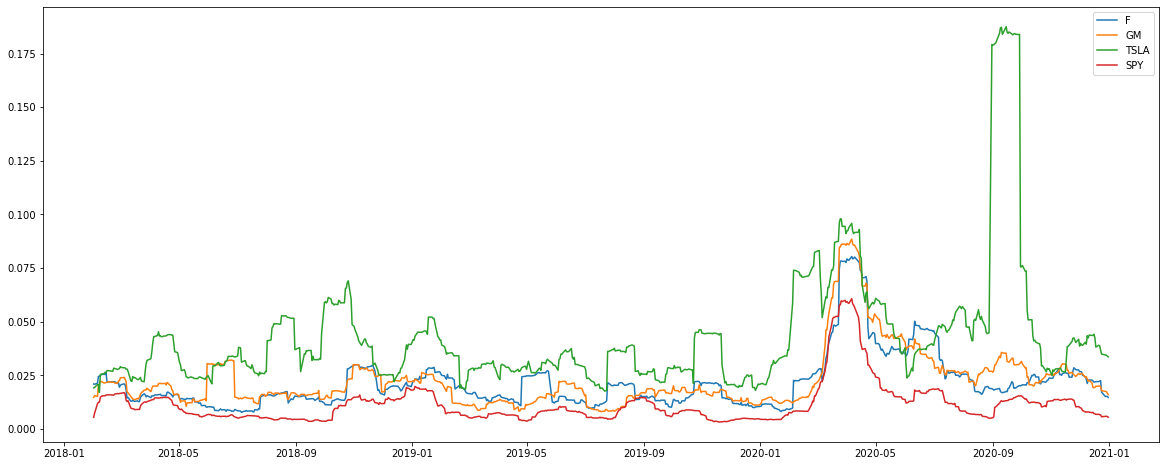

In [14]:
# Rolling Standard deviation 2018-2020
auto_std = auto_daily_returns.rolling(window=21).std()
auto_std.plot(figsize=(20,8))

In [16]:
csv_path = Path("Auto_MW_data.csv")
MW_data = pd.read_csv(csv_path)
auto_MW = pd.DataFrame(MW_data)
auto_MW

,Ticker,Year,Revenue (in B),EPS,Std
0,F,2018-01-01,160.34,0.93,0.017421
1,GM,2018-01-01,147.05,5.66,0.020181
2,TSLA,2018-01-01,21.46,-2.37,0.036817
3,F,2019-01-01,155.90,0.01,0.017286
4,GM,2019-01-01,137.24,4.62,0.015486
5,TSLA,2019-01-01,24.58,-1.14,0.030809
6,F,2020-01-01,127.14,-0.32,0.035382
7,GM,2020-01-01,122.49,4.36,0.038079
8,TSLA,2020-01-01,31.54,-0.98,0.074440


In [55]:
csv_path_2 = Path("Auto_Edgar_Unit_data.csv")
Edgar_data = pd.read_csv(csv_path_2)
auto_Edgar = pd.DataFrame(Edgar_data.head(9))
auto_Edgar

,Ticker,2018,2019,2020
0,F,5982000,5386000,4187000
1,GM,4707000,4209000,3370000
2,TSLA,245240,367656,499647


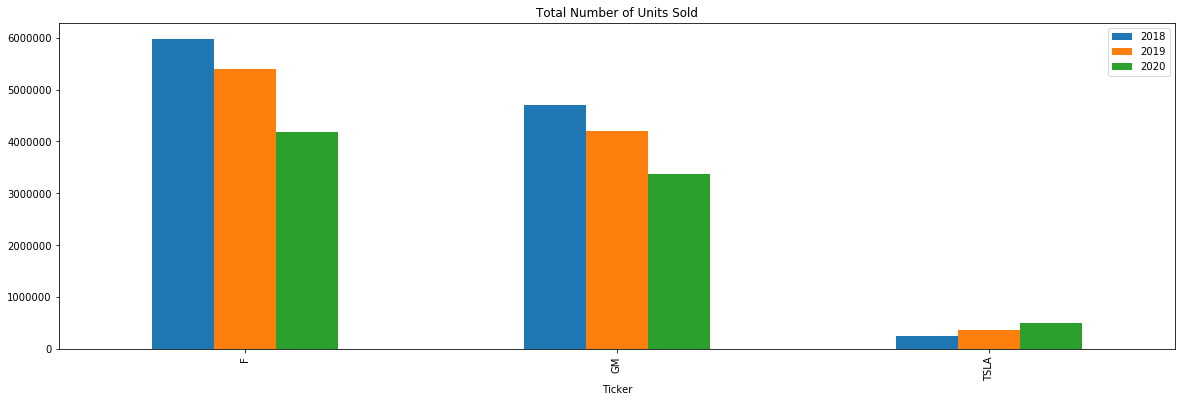

In [72]:
auto_sales = auto_Edgar
auto_sales = auto_sales.set_index("Ticker")
auto_sales.plot(kind="bar", title="Total Number of Units Sold", figsize=(20,6))

In [46]:
auto_Edgar.dtypes

Ticker     object
2018      float64
2019      float64
2020      float64
dtype: object

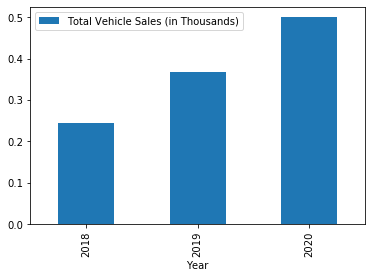

In [25]:
auto_sales = auto_Edgar[["Ticker", "Year", "Total Vehicle Sales"]]
auto_sales2018 = auto_sales.loc[auto_sales["Ticker"] == "TSLA"]
auto_sales2018 = auto_sales2018.set_index("Year")
auto_sales2018.plot.bar()

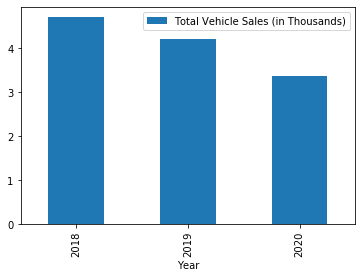

In [26]:
auto_sales = auto_Edgar[["Ticker", "Year", "Total Vehicle Sales (in Thousands)"]]
auto_sales2018 = auto_sales.loc[auto_sales["Ticker"] == "GM"]
auto_sales2018 = auto_sales2018.set_index("Year")
auto_sales2018.plot.bar()

In [31]:
# Revenue, Basic EPS, & std from Marketwatch from excel file

auto_rev = {
    "2018 Revenue (in B)": [160.34, 147.05, 21.46],
    "2019 Revenue (in B)": [155.90, 137.24, 24.58],
    "2020 Revenue (in B)": [127.14, 122.49, 31.54]
}

auto_eps = {
    "2018 EPS": [0.93, 5.66, -2.37],
    "2019 EPS": [0.01, 4.62, -1.14],
    "2020 EPS": [-0.32, 4.36, -0.98]
}

auto_Std = {
    "2018 Std": [0.017421, 0.020181, 0.036817],
    "2019 Std": [0.017286, 0.015486, 0.030809],
    "2020 Std": [0.035382, 0.038079, 0.074440]
}

tickers = ["F", "GM", "TSLA"]

In [32]:
auto_rev = pd.DataFrame(auto_rev, index=tickers)
auto_eps = pd.DataFrame(auto_eps, index=tickers)
auto_Std = pd.DataFrame(auto_Std, index=tickers)

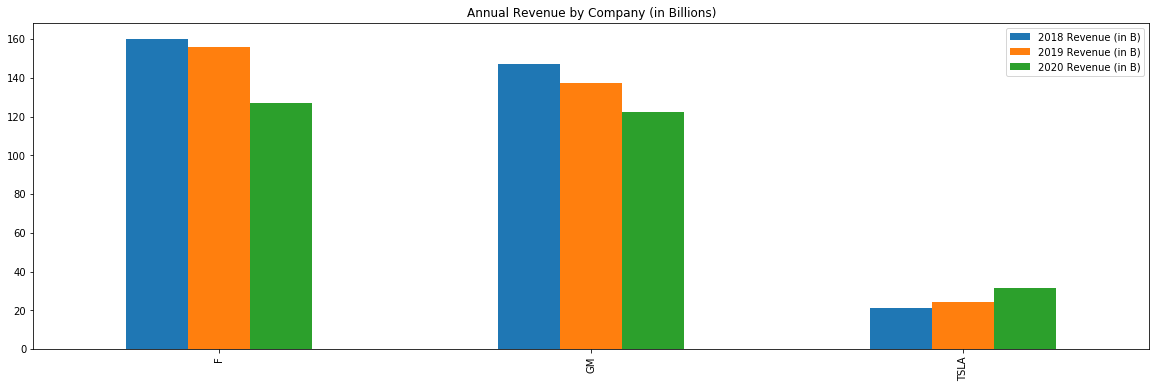

In [43]:
auto_rev.plot(title="Annual Revenue by Company (in Billions)",kind="bar", figsize=(20,6))

## 

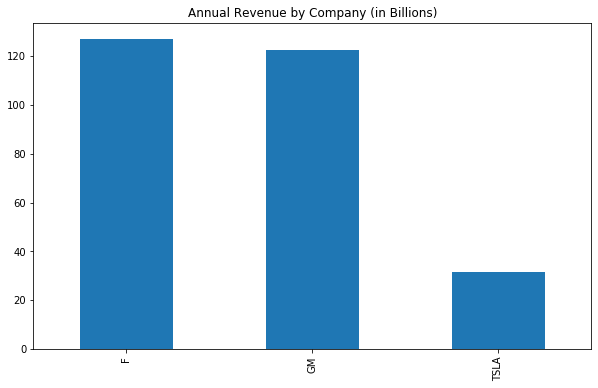

In [74]:
auto_rev["2020 Revenue (in B)"].plot(title="Annual Revenue by Company (in Billions)",kind="bar", figsize=(10,6))